# Doc2Vec to structure (315 repositories / train set)

## 1. Downloading the train set

In [21]:
!pip3 install gdown
!gdown 13Z-ReDj4QcwlfvIgUlL6MNE5W2dcPmLr


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Downloading...
From (uriginal): https://drive.google.com/uc?id=13Z-ReDj4QcwlfvIgUlL6MNE5W2dcPmLr
From (redirected): https://drive.google.com/uc?id=13Z-ReDj4QcwlfvIgUlL6MNE5W2dcPmLr&confirm=t&uuid=36866826-e35e-4b69-b8bf-8a1ac1fbf562
To: /Users/Henry/Documents/PyCharmProjects/RepoSim4Py/Doc2vec/Doc2vec_readme_train_315/repo_info_train.pkl
100%|████████████████████████████████████████| 202M/202M [00:10<00:00, 19.0MB/s]


In [22]:
import pickle

with open("repo_info_train.pkl", "rb") as f:
    repo_info_train = pickle.load(f)
    f.close()

In [23]:
next(iter(repo_info_train.keys()))

'jet-admin/jet-bridge'

In [24]:
type(repo_info_train[next(iter(repo_info_train.keys()))]["structure"]) # list

list

In [25]:
repo_info_train[next(iter(repo_info_train.keys()))]["structure"]

[{'release-tasks.sh': 'sh file',
  'install_jet.sh': 'sh file',
  '.deepsource.toml': 'toml file',
  'Dockerfile': 'docker file',
  'README.md': 'text file',
  'promotion.png': 'plot file',
  'LICENSE': 'license file',
  'app.json': 'json file',
  'requirements.txt': 'requirements file',
  'runtime.txt': 'text file',
  '.gitignore': 'git file',
  'Procfile': 'procfile file',
  'scripts': {'set_tags.sh': 'sh file', 'upload_all.sh': 'sh file'},
  'static': {'customize.jpg': 'jpg file',
   'overview.gif': 'gif file',
   'dashboard.png': 'plot file',
   'filters.png': 'plot file',
   'segment.png': 'plot file',
   'kanban.jpeg': 'jpeg file',
   'list.jpeg': 'jpeg file',
   'dashboard.jpeg': 'jpeg file',
   'promotion2.png': 'plot file',
   'users.png': 'plot file',
   'promotion.png': 'plot file',
   'kanban.png': 'plot file',
   'filters.jpeg': 'jpeg file',
   'customize.png': 'plot file',
   'segment.jpeg': 'jpeg file',
   'users.jpeg': 'jpeg file',
   'export.jpeg': 'jpeg file',
   'lis

In [26]:
" ".join(str(repo_info_train[next(iter(repo_info_train.keys()))]["structure"]))

"[ { ' r e l e a s e - t a s k s . s h ' :   ' s h   f i l e ' ,   ' i n s t a l l _ j e t . s h ' :   ' s h   f i l e ' ,   ' . d e e p s o u r c e . t o m l ' :   ' t o m l   f i l e ' ,   ' D o c k e r f i l e ' :   ' d o c k e r   f i l e ' ,   ' R E A D M E . m d ' :   ' t e x t   f i l e ' ,   ' p r o m o t i o n . p n g ' :   ' p l o t   f i l e ' ,   ' L I C E N S E ' :   ' l i c e n s e   f i l e ' ,   ' a p p . j s o n ' :   ' j s o n   f i l e ' ,   ' r e q u i r e m e n t s . t x t ' :   ' r e q u i r e m e n t s   f i l e ' ,   ' r u n t i m e . t x t ' :   ' t e x t   f i l e ' ,   ' . g i t i g n o r e ' :   ' g i t   f i l e ' ,   ' P r o c f i l e ' :   ' p r o c f i l e   f i l e ' ,   ' s c r i p t s ' :   { ' s e t _ t a g s . s h ' :   ' s h   f i l e ' ,   ' u p l o a d _ a l l . s h ' :   ' s h   f i l e ' } ,   ' s t a t i c ' :   { ' c u s t o m i z e . j p g ' :   ' j p g   f i l e ' ,   ' o v e r v i e w . g i f ' :   ' g i f   f i l e ' ,   ' d a s h b o a r

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels = [repo_info_train[repo_name]["topic"] for repo_name in list(repo_info_train.keys())]
encoded_labels = label_encoder.fit_transform(labels)

# Print the encoded labels
print(encoded_labels)

[  1  64  32  25  52  18  41  95  72  10  24 103  60 106  15  50  13  75
  29  44  82 112  36  39  49  83  58  58 118  43  63  66   2  93 109  48
  29  70  78   4  67  43  28  87 117 104  91  64  72  52  55  29  91   2
  90  64  83  41  72 109  74  56  96  16 109  17  29 117 112  67  77  14
  54  10   9  72  82  97  76  46  31  43  99  21 118  98   7  96  62  74
  79  57 105  83  30  49   7  75  60  44  13  59  98  86  52 116  52  29
  37 111 110  26  15 115  31  49  31  92 113   6  72 116  66  83   3  69
  21 111  42  22  81  51  69  47  16  22 109  27  51  68 115   2  93 117
  64  70  91  84  49  76  13 109  91   0  11  47  56  98  31  34   6  37
  40  40  70  47  58  53 117  68  63   1  44 118  52 101  44  58  43  80
   9 108  91 118  66  24  71  91  91  97 110  22  87  38  13  45   9  82
  86  47  47 114  26 116 117  19 113  41 107 115  43  47  94  27  48  56
  12  33  25  49  37  45  96  25  41  32  56   8  19 104  62 100 104   6
  76  56  72  97 119   6  11  23  27  52  25  74  4

## 2. Processing data and building corpus

In [28]:
!pip3 install gensim


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [29]:
corpus = []
for repo_name, repo_dict in repo_info_train.items():
    structure_str = " ".join(str(repo_info_train[repo_name]["structure"]))
    corpus.append(structure_str)

In [30]:
len(corpus)

315

In [31]:
file_path = "structure_train_corpus.txt"

with open(file_path, "w") as file:
    for sentence in corpus:
        file.write(sentence + "\n")

file.close()

## 3. Building doc2vec model

In [32]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [33]:
import gensim
import smart_open

def read_corpus(fname, tokens_only=False):
    with smart_open.open(fname, encoding="utf-8") as f:
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(str(tokens), [encoded_labels[i]])

train_corpus = list(read_corpus(file_path))

In [34]:
len(train_corpus)

315

In [35]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=10, min_count=2, epochs=100)

2023-07-06 19:18:12,865 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec<dm/m,d10,n5,w5,mc2,s0.001,t3>', 'datetime': '2023-07-06T19:18:12.865570', 'gensim': '4.3.1', 'python': '3.10.12 (main, Jun 20 2023, 19:43:52) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.4.1-arm64-arm-64bit', 'event': 'created'}


In [36]:
model.build_vocab(train_corpus)

2023-07-06 19:18:14,236 : INFO : collecting all words and their counts
2023-07-06 19:18:14,237 : WARNING : Each 'words' should be a list of words (usually unicode strings). First 'words' here is instead plain <class 'str'>.
2023-07-06 19:18:14,238 : INFO : PROGRESS: at example #0, processed 0 words (0 words/s), 0 word types, 0 tags
2023-07-06 19:18:14,240 : INFO : collected 2 word types and 120 unique tags from a corpus of 315 examples and 630 words
2023-07-06 19:18:14,241 : INFO : Creating a fresh vocabulary
2023-07-06 19:18:14,242 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=2 retains 2 unique words (100.00% of original 2, drops 0)', 'datetime': '2023-07-06T19:18:14.242113', 'gensim': '4.3.1', 'python': '3.10.12 (main, Jun 20 2023, 19:43:52) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.4.1-arm64-arm-64bit', 'event': 'prepare_vocab'}
2023-07-06 19:18:14,242 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 630 word corpus (100.00%

In [37]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

2023-07-06 19:18:17,854 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 2 vocabulary and 10 features, using sg=0 hs=0 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2023-07-06T19:18:17.854491', 'gensim': '4.3.1', 'python': '3.10.12 (main, Jun 20 2023, 19:43:52) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.4.1-arm64-arm-64bit', 'event': 'train'}
2023-07-06 19:18:17,870 : INFO : EPOCH 0: training on 630 raw words (335 effective words) took 0.0s, 32143 effective words/s
2023-07-06 19:18:17,880 : INFO : EPOCH 1: training on 630 raw words (344 effective words) took 0.0s, 163020 effective words/s
2023-07-06 19:18:17,887 : INFO : EPOCH 2: training on 630 raw words (348 effective words) took 0.0s, 15878832 effective words/s
2023-07-06 19:18:17,895 : INFO : EPOCH 3: training on 630 raw words (341 effective words) took 0.0s, 447899 effective words/s
2023-07-06 19:18:17,903 : INFO : EPOCH 4: training on 630 raw words (350 effective 

2023-07-06 19:18:18,143 : INFO : EPOCH 62: training on 630 raw words (347 effective words) took 0.0s, 215188 effective words/s
2023-07-06 19:18:18,147 : INFO : EPOCH 63: training on 630 raw words (347 effective words) took 0.0s, 427647 effective words/s
2023-07-06 19:18:18,151 : INFO : EPOCH 64: training on 630 raw words (341 effective words) took 0.0s, 176821 effective words/s
2023-07-06 19:18:18,155 : INFO : EPOCH 65: training on 630 raw words (346 effective words) took 0.0s, 274159 effective words/s
2023-07-06 19:18:18,158 : INFO : EPOCH 66: training on 630 raw words (346 effective words) took 0.0s, 22688525 effective words/s
2023-07-06 19:18:18,162 : INFO : EPOCH 67: training on 630 raw words (345 effective words) took 0.0s, 159439 effective words/s
2023-07-06 19:18:18,165 : INFO : EPOCH 68: training on 630 raw words (351 effective words) took 0.0s, 124857 effective words/s
2023-07-06 19:18:18,169 : INFO : EPOCH 69: training on 630 raw words (344 effective words) took 0.0s, 160105 

In [40]:
vector = model.infer_vector(list(str(repo_info_train[next(iter(repo_info_train.keys()))]["structure"])))
vector.shape

(10,)

## 4. Similarity calculation

In [46]:
import torch
from tqdm import tqdm
from torch.nn import CosineSimilarity
from itertools import combinations
import pandas as pd

cossim = CosineSimilarity(dim=0, eps=1e-8)
res = []
num_of_repos = len(repo_info_train)
num_of_rows = num_of_repos * (num_of_repos - 1) // 2

for repo1, repo2 in tqdm(combinations(repo_info_train.keys(), 2), total=num_of_rows):
    row = [repo1, repo2, repo_info_train[repo1]["topic"], repo_info_train[repo2]["topic"]]
    embedding1 = torch.tensor(model.infer_vector(list(str(repo_info_train[repo1]["structure"]))))
    embedding2 = torch.tensor(model.infer_vector(list(str(repo_info_train[repo2]["structure"]))))
    similarity = cossim(embedding1, embedding2).cpu().detach().numpy().item()
    row.append(similarity)

    res.append(row)

df = pd.DataFrame(res, columns=["repo1", "repo2", "topic1", "topic2", "doc2vec_structure"])
df

100%|███████████████████████████████████| 49455/49455 [3:04:04<00:00,  4.48it/s]


,repo1,repo2,topic1,topic2,doc2vec_structure
0,jet-admin/jet-bridge,patrys/httmock,Admin Panels,Mock,0.369191
1,jet-admin/jet-bridge,pytransitions/transitions,Admin Panels,Design Patterns,0.700269
2,jet-admin/jet-bridge,keleshev/schema,Admin Panels,Data Validation,0.371084
3,jet-admin/jet-bridge,dylanaraps/pywal,Admin Panels,Image Processing,-0.138929
4,jet-admin/jet-bridge,PyCQA/modernize,Admin Panels,Compatibility,-0.021582
...,...,...,...,...,...
49450,thauber/django-schedule,Miserlou/Zappa,Job Scheduler,Serverless Frameworks,-0.102069
49451,thauber/django-schedule,jek/blinker,Job Scheduler,Miscellaneous,0.401596
49452,Yelp/mrjob,Miserlou/Zappa,Batch Processing,Serverless Frameworks,-0.099992
49453,Yelp/mrjob,jek/blinker,Batch Processing,Miscellaneous,0.583447


In [47]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,repo1,repo2,topic1,topic2,doc2vec_structure
0,jet-admin/jet-bridge,patrys/httmock,Admin Panels,Mock,0.369191
1,jet-admin/jet-bridge,pytransitions/transitions,Admin Panels,Design Patterns,0.700269
2,jet-admin/jet-bridge,keleshev/schema,Admin Panels,Data Validation,0.371084
3,jet-admin/jet-bridge,dylanaraps/pywal,Admin Panels,Image Processing,-0.138929
4,jet-admin/jet-bridge,PyCQA/modernize,Admin Panels,Compatibility,-0.021582
...,...,...,...,...,...
49450,thauber/django-schedule,Miserlou/Zappa,Job Scheduler,Serverless Frameworks,-0.102069
49451,thauber/django-schedule,jek/blinker,Job Scheduler,Miscellaneous,0.401596
49452,Yelp/mrjob,Miserlou/Zappa,Batch Processing,Serverless Frameworks,-0.099992
49453,Yelp/mrjob,jek/blinker,Batch Processing,Miscellaneous,0.583447


In [48]:
df.sort_values("doc2vec_structure", ascending=False).reset_index(drop=True)

,repo1,repo2,topic1,topic2,doc2vec_structure
0,PySimpleGUI/PySimpleGUI,sunainapai/makesite,GUI Development,Static Site Generator,0.937233
1,dmlc/xgboost,mozillazg/python-pinyin,Machine Learning,Specific Formats Processing - General,0.934702
2,timothycrosley/isort,nicfit/eyeD3,Code Formatters,Metadata,0.929267
3,hugapi/hug,nucleic/enaml,Framework agnostic,GUI Development,0.923697
4,getsentry/responses,AtsushiSakai/PythonRobotics,Mock,Robotics,0.919612
...,...,...,...,...,...
49450,pytoolz/toolz,thauber/django-schedule,Functional Programming,Job Scheduler,-0.863035
49451,mahmoud/boltons,pybuilder/pybuilder,Miscellaneous,Build Tools,-0.870492
49452,lektor/lektor,khamidou/lptrace,Static Site Generator,Tracing,-0.870839
49453,esnme/ultrajson,dmlc/xgboost,Serialization,Machine Learning,-0.872093


In [49]:
df.to_csv("structure_doc2vec_evaluation_train_315.csv")

## 5. Evaluation

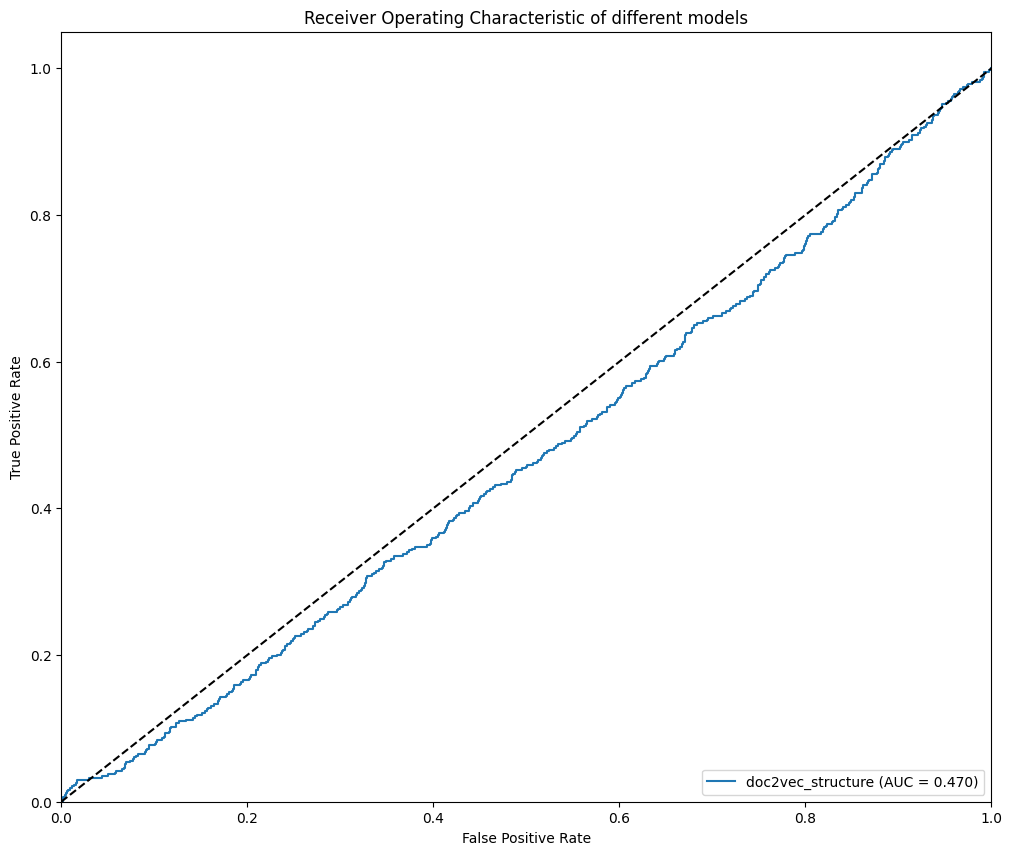

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model_auc = {}
y_true = df['topic1'] == df['topic2']
fig = plt.figure(figsize=(12, 10))

model_names = ["doc2vec_structure"]

def roc(model_name):
    y_score = df[model_name]
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    model_auc[model_name] = roc_auc

    plt.plot(fpr, tpr, label=model_name)


for model_name in model_names:
    roc(model_name)

# Order labels by each model's auc score
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda k: -model_auc[labels[k]])
ordered_handles = [handles[idx] for idx in order]
ordered_labels = [f'{labels[idx]} (AUC = {model_auc[labels[idx]]:.3f})' for idx in order]
plt.legend(ordered_handles, ordered_labels, loc="lower right")

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic of different models')
plt.savefig('roc_doc2vec_structure_evaluation_train_315.png')
plt.show()

In [51]:
model_auc

{'doc2vec_structure': 0.46952751487080213}